In [1]:
import numpy as np
import pandas as pd
import plots
plots.use_JHU_github_live_data()

In [2]:
cases, deaths, recovered = plots.parse_country_data()

using live data


In [3]:
us_cases, us_deaths, us_testing = plots.parse_us_state_data()

using live data


In [4]:
wi_cases, wi_deaths, wi_testing = plots.parse_us_county_data("Wisconsin")

using live data


In [5]:
country_list = ["US","Canada","Israel","Italy","Spain","Sweden","Germany","United Kingdom"]
#country_list = ["US"]
fit_info = {'constant':2, 'length':8, 'type':'last'}
per_capita_layout =  zip([cases,deaths],["cases","deaths"],[1,1])
raw_layout = zip([cases,deaths],["cases","deaths"],[100,5])

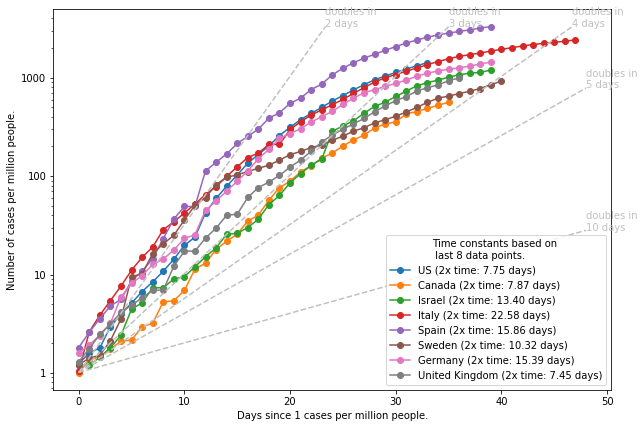

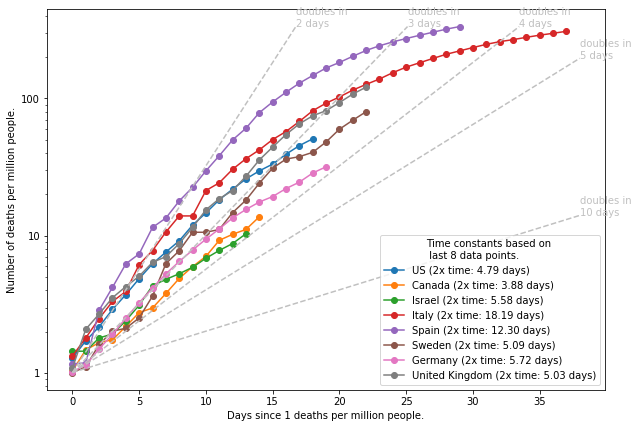

In [6]:
for data_set, data_type, threshold in per_capita_layout:
    plots.semilog_per_capita_since(((data_set, country_list,plots.pop_data),), data_type=data_type,
                                threshold=threshold,
                                fit_info = fit_info)

In [7]:
all_data_list = [((us_cases, ["Wisconsin","New York"], None),(wi_cases,["Dane","Milwaukee","Waukesha"],None)),
                 ((us_deaths, ["Wisconsin","New York"], None),(wi_deaths,["Milwaukee"],None))]

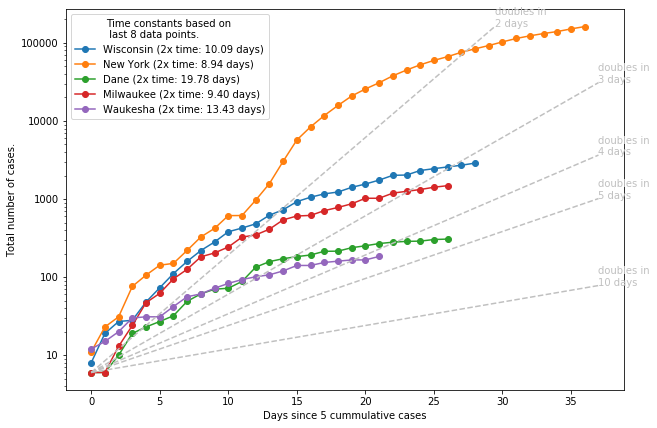

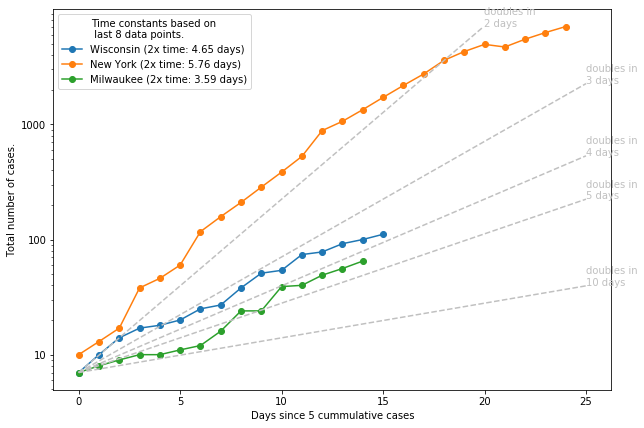

In [8]:
for data_list in all_data_list:
    plots.semilog_since(data_list,
                        data_type="cases",
                        threshold=5,
                        fit_info = fit_info)

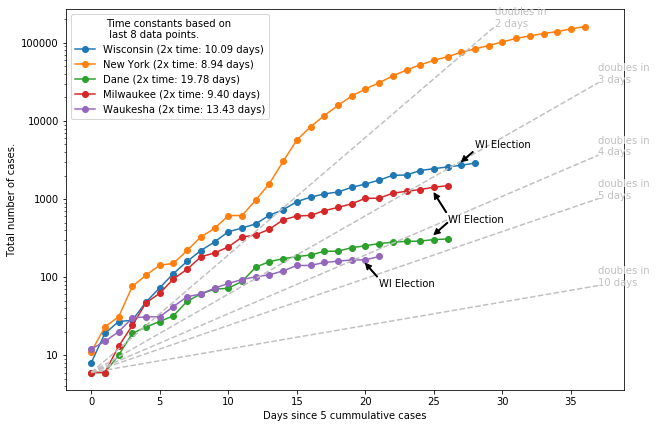

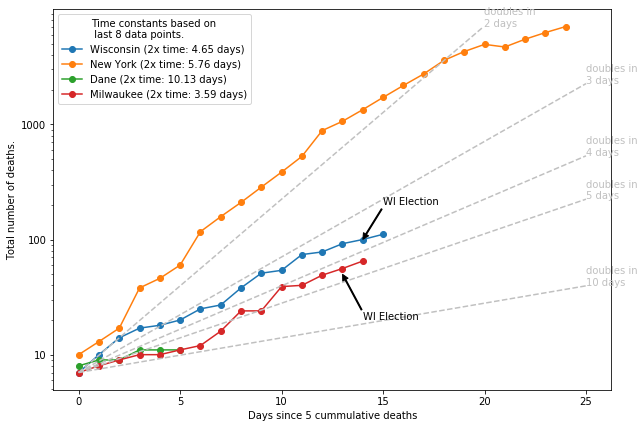

In [21]:
wi_election_cases_labels = ((27,3000,28,4500,"WI Election"), # State
                          (25,1200,26,500,"WI Election"), # MKE
                          (25,350,26,500,""), # Dane - reuse MKE label
                          (20,150,21,75,"WI Election")) # Waukesha
plots.semilog_since(((us_cases, ["Wisconsin","New York"], None),(wi_cases,["Dane","Milwaukee","Waukesha"],None)),
                       data_type="cases", threshold=5, fit_info=fit_info,labels=wi_election_cases_labels)
fig = plots.semilog_since(((us_deaths, ["Wisconsin","New York"], None),(wi_deaths,["Dane","Milwaukee","Waukesha"],None)),
                       data_type="deaths", threshold=5, fit_info=fit_info,labels=((14,100,15,200,"WI Election"),(13,50,14,20,"WI Election")))

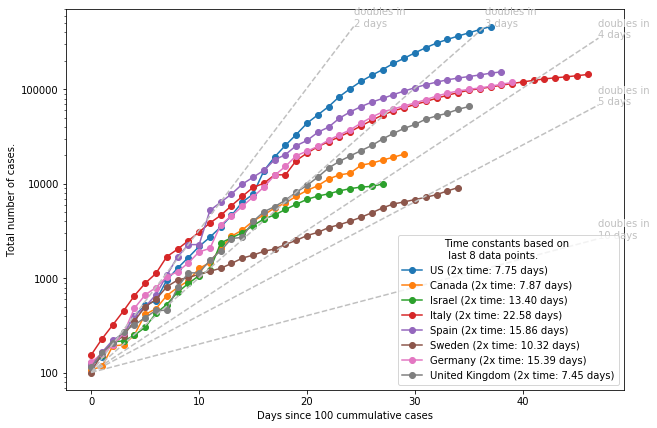

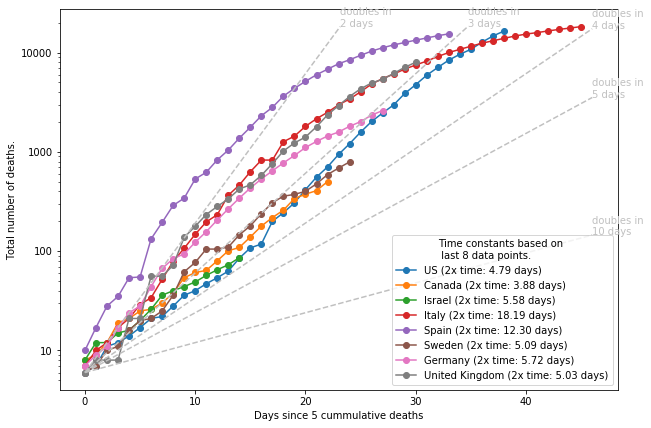

In [10]:
for data_set, data_type, threshold in raw_layout:
    plots.semilog_since(((data_set, country_list, None),),
                                   data_type=data_type,
                                   threshold=threshold,
                                   fit_info = fit_info)

using live data
A total of 184 countries confirmed at least one case of covid-19
Mean death rate for US: 0.0268 (+-0.0153 std)
Mean death rate for Canada: 0.0124 (+-0.0046 std)
Mean death rate for Israel: 0.0043 (+-0.0022 std)
Mean death rate for Italy: 0.0747 (+-0.0367 std)
Mean death rate for Spain: 0.0574 (+-0.0318 std)
Mean death rate for Sweden: 0.0303 (+-0.0267 std)
Mean death rate for Germany: 0.0077 (+-0.0064 std)
Mean death rate for United Kingdom: 0.0514 (+-0.0346 std)


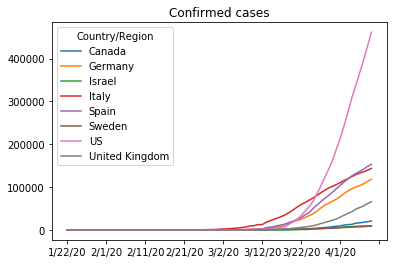

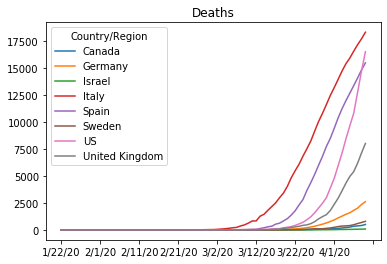

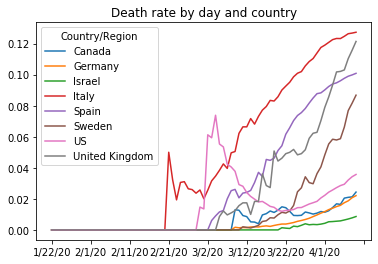

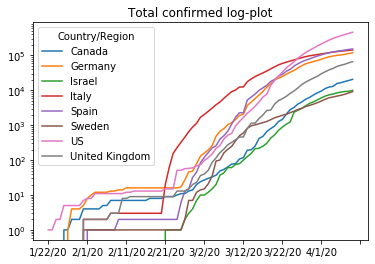

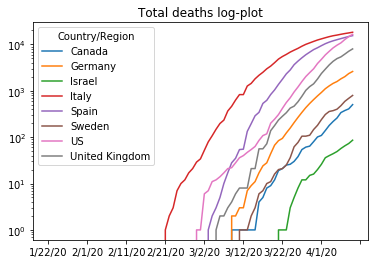

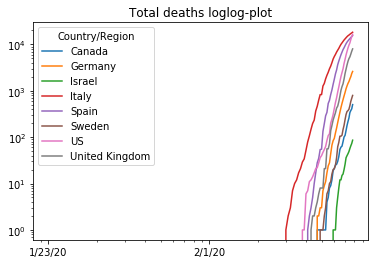

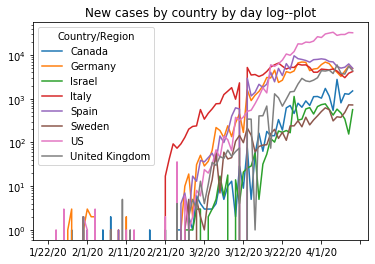

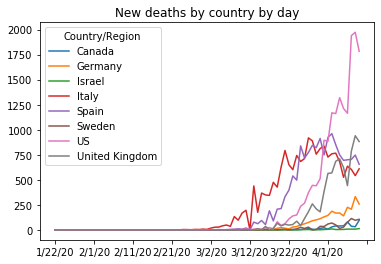

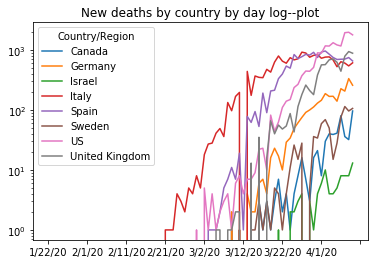

In [11]:
plots.generate_all_plots(country_list)

using live data


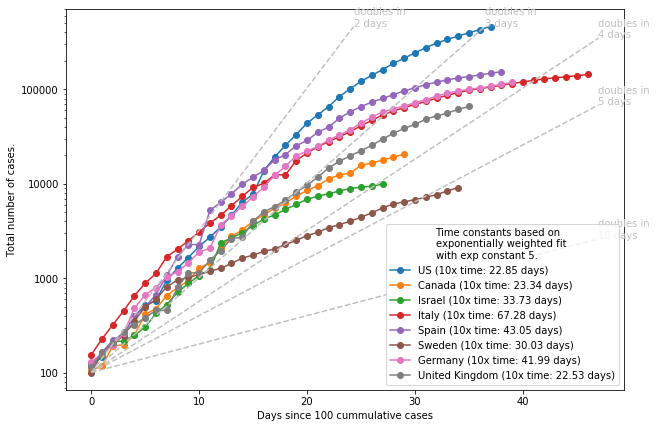

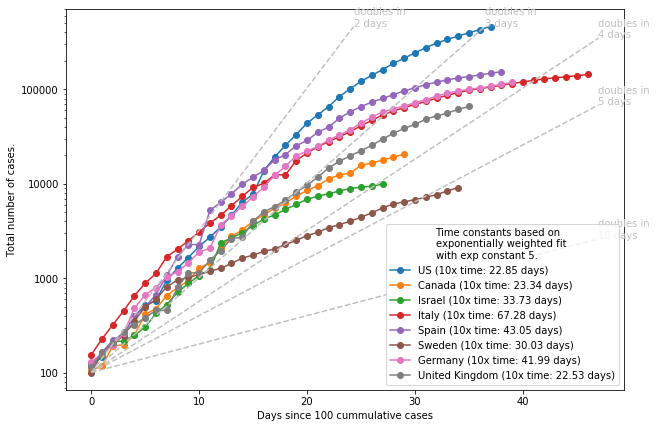

In [12]:
plots.semilog_cases_since(country_list)